In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

from sklearn import preprocessing

import seaborn as sns
from scipy.signal import filtfilt
from scipy import stats
import scipy
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings("ignore")

In [3]:
df_word=pd.read_csv("/content/drive/MyDrive/Programs/final_project/input/classes_V01.txt",sep="\t",header=None)

df_word.columns=['name','repetition','image_category','category']

df_word.head(2)

,name,repetition,image_category,category
0,"domestic cat, house cat, Felis domesticus, Fel...",24,n02121808,Mammals
1,"rock python, rock snake, Python sebae",29,n01744401,Reptile


In [4]:
#read complete merged file
df=pd.read_csv("/content/drive/MyDrive/Programs/final_project/output/merged.csv")
df.shape

(70060, 450)

In [5]:
df=df.iloc[:,1:]    #all data
#df=df.iloc[:100,1:]    #sample data (should be multiple of 5)
df.head(6)

,global_session_id,number_of_sessions,image_id,image_category,channels,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,t_11,t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_20,t_21,t_22,t_23,t_24,t_25,t_26,t_27,t_28,t_29,t_30,t_31,t_32,t_33,t_34,t_35,...,t_405,t_406,t_407,t_408,t_409,t_410,t_411,t_412,t_413,t_414,t_415,t_416,t_417,t_418,t_419,t_420,t_421,t_422,t_423,t_424,t_425,t_426,t_427,t_428,t_429,t_430,t_431,t_432,t_433,t_434,t_435,t_436,t_437,t_438,t_439,t_440,t_441,t_442,t_443,t_444
0,2602,1,4823,n02077923,AF3,4320.000000,4332.307692,4334.871795,4342.564103,4333.333333,4313.333333,4318.974359,4349.743590,4358.974359,4335.384615,4321.025641,4333.333333,4345.641026,4334.358974,4321.025641,4320.000000,4321.538462,4320.000000,4311.794872,4309.230769,4311.282051,4301.025641,4288.205128,4291.794872,4296.923077,4290.769231,4303.076923,4337.435897,4334.358974,4298.974359,4292.307692,4305.128205,4305.641026,4305.641026,4303.589744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2602,1,4823,n02077923,AF4,4294.871795,4305.128205,4298.974359,4307.179487,4312.307692,4284.102564,4274.871795,4314.358974,4330.769231,4324.615385,4311.282051,4275.384615,4284.615385,4322.564103,4318.461538,4285.641026,4272.820513,4307.692308,4353.333333,4341.538462,4307.179487,4307.692308,4307.692308,4304.615385,4321.538462,4312.307692,4292.307692,4298.461538,4285.641026,4278.461538,4311.282051,4318.974359,4297.435897,4301.025641,4321.538462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2602,1,4823,n02077923,T7,4187.692308,4200.000000,4208.717949,4199.487179,4199.487179,4208.205128,4210.769231,4228.205128,4258.974359,4257.948718,4232.820513,4235.384615,4251.282051,4246.666667,4245.128205,4245.641026,4237.948718,4237.948718,4237.435897,4229.743590,4237.435897,4245.641026,4230.769231,4222.051282,4230.256410,4232.307692,4227.179487,4231.282051,4244.102564,4250.769231,4241.538462,4231.794872,4237.435897,4244.615385,4244.615385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2602,1,4823,n02077923,T8,4203.076923,4224.615385,4249.743590,4231.794872,4190.769231,4186.666667,4208.717949,4223.589744,4226.153846,4229.230769,4233.846154,4222.564103,4210.256410,4215.384615,4217.948718,4202.051282,4188.717949,4202.564103,4215.897436,4219.487179,4226.666667,4214.358974,4183.589744,4184.102564,4221.538462,4242.564103,4226.153846,4217.948718,4225.128205,4208.717949,4185.128205,4206.153846,4228.717949,4204.102564,4182.051282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2602,1,4823,n02077923,Pz,4145.128205,4138.461538,4145.128205,4142.051282,4132.307692,4134.358974,4137.948718,4146.153846,4155.384615,4149.743590,4147.692308,4152.820513,4145.128205,4138.461538,4146.153846,4144.615385,4140.512821,4152.820513,4168.717949,4175.384615,4167.692308,4150.256410,4147.179487,4157.948718,4148.717949,4130.256410,4138.461538,4154.871795,4136.410256,4113.846154,4135.897436,4161.538462,4154.358974,4146.153846,4150.769231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2601,1,168,n02089078,AF3,4279.487179,4279.487179,4280.512821,4297.435897,4315.384615,4299.487179,4278.974359,4292.307692,4302.051282,4299.487179,4297.948718,4289.230769,4289.230769,4297.948718,4297.435897,4293.846154,4282.051282,4261.025641,4275.897436,4299.487179,4286.666667,4275.384615,4271.282051,4282.051282,4297.435897,4280.512821,4267.692308,4277.948718,4284.102564,4289.230769,4291.794872,4278.974359,4274.358974,4281.025641,4282.564103,...,NaN,NaN,NaN

In [6]:
df = df.merge(df_word.drop(['name','repetition'],axis=1), how = 'inner', on = ['image_category'])

#move newly added to first location
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

print(df.shape)
df.head()

(70060, 450)


,category,global_session_id,number_of_sessions,image_id,image_category,channels,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,t_11,t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_20,t_21,t_22,t_23,t_24,t_25,t_26,t_27,t_28,t_29,t_30,t_31,t_32,t_33,t_34,...,t_405,t_406,t_407,t_408,t_409,t_410,t_411,t_412,t_413,t_414,t_415,t_416,t_417,t_418,t_419,t_420,t_421,t_422,t_423,t_424,t_425,t_426,t_427,t_428,t_429,t_430,t_431,t_432,t_433,t_434,t_435,t_436,t_437,t_438,t_439,t_440,t_441,t_442,t_443,t_444
0,Mammals,2602,1,4823,n02077923,AF3,4320.000000,4332.307692,4334.871795,4342.564103,4333.333333,4313.333333,4318.974359,4349.743590,4358.974359,4335.384615,4321.025641,4333.333333,4345.641026,4334.358974,4321.025641,4320.000000,4321.538462,4320.000000,4311.794872,4309.230769,4311.282051,4301.025641,4288.205128,4291.794872,4296.923077,4290.769231,4303.076923,4337.435897,4334.358974,4298.974359,4292.307692,4305.128205,4305.641026,4305.641026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mammals,2602,1,4823,n02077923,AF4,4294.871795,4305.128205,4298.974359,4307.179487,4312.307692,4284.102564,4274.871795,4314.358974,4330.769231,4324.615385,4311.282051,4275.384615,4284.615385,4322.564103,4318.461538,4285.641026,4272.820513,4307.692308,4353.333333,4341.538462,4307.179487,4307.692308,4307.692308,4304.615385,4321.538462,4312.307692,4292.307692,4298.461538,4285.641026,4278.461538,4311.282051,4318.974359,4297.435897,4301.025641,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mammals,2602,1,4823,n02077923,T7,4187.692308,4200.000000,4208.717949,4199.487179,4199.487179,4208.205128,4210.769231,4228.205128,4258.974359,4257.948718,4232.820513,4235.384615,4251.282051,4246.666667,4245.128205,4245.641026,4237.948718,4237.948718,4237.435897,4229.743590,4237.435897,4245.641026,4230.769231,4222.051282,4230.256410,4232.307692,4227.179487,4231.282051,4244.102564,4250.769231,4241.538462,4231.794872,4237.435897,4244.615385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mammals,2602,1,4823,n02077923,T8,4203.076923,4224.615385,4249.743590,4231.794872,4190.769231,4186.666667,4208.717949,4223.589744,4226.153846,4229.230769,4233.846154,4222.564103,4210.256410,4215.384615,4217.948718,4202.051282,4188.717949,4202.564103,4215.897436,4219.487179,4226.666667,4214.358974,4183.589744,4184.102564,4221.538462,4242.564103,4226.153846,4217.948718,4225.128205,4208.717949,4185.128205,4206.153846,4228.717949,4204.102564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mammals,2602,1,4823,n02077923,Pz,4145.128205,4138.461538,4145.128205,4142.051282,4132.307692,4134.358974,4137.948718,4146.153846,4155.384615,4149.743590,4147.692308,4152.820513,4145.128205,4138.461538,4146.153846,4144.615385,4140.512821,4152.820513,4168.717949,4175.384615,4167.692308,4150.256410,4147.179487,4157.948718,4148.717949,4130.256410,4138.461538,4154.871795,4136.410256,4113.846154,4135.897436,4161.538462,4154.358974,4146.153846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(70060, 450)

In [8]:
print(df['image_category'].value_counts())

n01776313    220
n02411705    210
n02101388    205
n01674464    195
n02012849    190
            ... 
n02091032     60
n01982650     55
n02687172     55
n03908618     50
n02089973     40
Name: image_category, Length: 569, dtype: int64


In [9]:
print(df['category'].value_counts())

Mammals              23310
Bird                  6875
Vehicle               4035
Reptile               3870
KitchenWare           3245
Electronics           3140
Sports                2905
MusicInstrument       2465
Furniture             2180
shipboat              1860
Place                 1620
Insect                1545
Clothe                1495
amphibian             1350
Food                  1220
Fruit                 1095
Tool                  1030
MedicalInstrument      915
Vegitable              875
Cosmetics              850
Fish                   755
Human                  745
Arthropods             685
Stationary             635
Event                  465
Road                   385
Airport                225
arachnids              175
Asteroidea             110
Name: category, dtype: int64


## Data Properties
- shape
- columns
- data types
- number of unique classes in target column

In [10]:
df.shape

(70060, 450)

In [11]:
df.columns

Index(['category', 'global_session_id', 'number_of_sessions', 'image_id',
       'image_category', 'channels', 't_1', 't_2', 't_3', 't_4',
       ...
       't_435', 't_436', 't_437', 't_438', 't_439', 't_440', 't_441', 't_442',
       't_443', 't_444'],
      dtype='object', length=450)

In [12]:
df.dtypes

category               object
global_session_id       int64
number_of_sessions      int64
image_id                int64
image_category         object
                       ...   
t_440                 float64
t_441                 float64
t_442                 float64
t_443                 float64
t_444                 float64
Length: 450, dtype: object

In [13]:
print(len(df['image_category'].unique()))
df['image_category'].unique()

569


array(['n02077923', 'n02089078', 'n07714571', 'n04065464', 'n02815834',
       'n04554684', 'n02105855', 'n01882714', 'n03619890', 'n01833805',
       'n02786058', 'n03791053', 'n02113712', 'n02958343', 'n03085013',
       'n03942813', 'n08256735', 'n02106030', 'n01843065', 'n02112706',
       'n02693246', 'n02111277', 'n07718747', 'n01770393', 'n02009229',
       'n03790512', 'n07697313', 'n04335209', 'n02107312', 'n03211117',
       'n01734418', 'n03494278', 'n01514859', 'n01755581', 'n03782006',
       'n01742172', 'n02105505', 'n03447447', 'n03538406', 'n01817953',
       'n01665541', 'n02123394', 'n02487347', 'n02096585', 'n02002556',
       'n03720891', 'n02028035', 'n07745940', 'n02112018', 'n02107908',
       'n01910747', 'n01664065', 'n01644373', 'n02403003', 'n02672831',
       'n01503061', 'n03673027', 'n02093754', 'n02119789', 'n01662784',
       'n02276258', 'n01614925', 'n02105641', 'n02095314', 'n01560419',
       'n02132136', 'n08539072', 'n07583066', 'n03400231', 'n077

In [14]:
print(len(df['category'].unique()))
df['category'].unique()

29


array(['Mammals', 'Vegitable', 'Place', 'MedicalInstrument',
       'Electronics', 'KitchenWare', 'Bird', 'Vehicle', 'Sports', 'Event',
       'Airport', 'arachnids', 'Food', 'Road', 'Reptile',
       'MusicInstrument', 'shipboat', 'amphibian', 'Fruit', 'Fish',
       'Human', 'Furniture', 'Cosmetics', 'Arthropods', 'Clothe',
       'Stationary', 'Tool', 'Insect', 'Asteroidea'], dtype=object)

In [15]:
#remove target column
df=df.drop(['global_session_id',	'number_of_sessions',	'image_id'],axis=1)

df.head(3)


,category,image_category,channels,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,t_11,t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_20,t_21,t_22,t_23,t_24,t_25,t_26,t_27,t_28,t_29,t_30,t_31,t_32,t_33,t_34,t_35,t_36,t_37,...,t_405,t_406,t_407,t_408,t_409,t_410,t_411,t_412,t_413,t_414,t_415,t_416,t_417,t_418,t_419,t_420,t_421,t_422,t_423,t_424,t_425,t_426,t_427,t_428,t_429,t_430,t_431,t_432,t_433,t_434,t_435,t_436,t_437,t_438,t_439,t_440,t_441,t_442,t_443,t_444
0,Mammals,n02077923,AF3,4320.000000,4332.307692,4334.871795,4342.564103,4333.333333,4313.333333,4318.974359,4349.743590,4358.974359,4335.384615,4321.025641,4333.333333,4345.641026,4334.358974,4321.025641,4320.000000,4321.538462,4320.000000,4311.794872,4309.230769,4311.282051,4301.025641,4288.205128,4291.794872,4296.923077,4290.769231,4303.076923,4337.435897,4334.358974,4298.974359,4292.307692,4305.128205,4305.641026,4305.641026,4303.589744,4286.153846,4273.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mammals,n02077923,AF4,4294.871795,4305.128205,4298.974359,4307.179487,4312.307692,4284.102564,4274.871795,4314.358974,4330.769231,4324.615385,4311.282051,4275.384615,4284.615385,4322.564103,4318.461538,4285.641026,4272.820513,4307.692308,4353.333333,4341.538462,4307.179487,4307.692308,4307.692308,4304.615385,4321.538462,4312.307692,4292.307692,4298.461538,4285.641026,4278.461538,4311.282051,4318.974359,4297.435897,4301.025641,4321.538462,4325.128205,4320.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mammals,n02077923,T7,4187.692308,4200.000000,4208.717949,4199.487179,4199.487179,4208.205128,4210.769231,4228.205128,4258.974359,4257.948718,4232.820513,4235.384615,4251.282051,4246.666667,4245.128205,4245.641026,4237.948718,4237.948718,4237.435897,4229.743590,4237.435897,4245.641026,4230.769231,4222.051282,4230.256410,4232.307692,4227.179487,4231.282051,4244.102564,4250.769231,4241.538462,4231.794872,4237.435897,4244.615385,4244.615385,4244.102564,4233.846154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.describe() #other data properties

,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,t_11,t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_20,t_21,t_22,t_23,t_24,t_25,t_26,t_27,t_28,t_29,t_30,t_31,t_32,t_33,t_34,t_35,t_36,t_37,t_38,t_39,t_40,...,t_405,t_406,t_407,t_408,t_409,t_410,t_411,t_412,t_413,t_414,t_415,t_416,t_417,t_418,t_419,t_420,t_421,t_422,t_423,t_424,t_425,t_426,t_427,t_428,t_429,t_430,t_431,t_432,t_433,t_434,t_435,t_436,t_437,t_438,t_439,t_440,t_441,t_442,t_443,t_444
count,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,70060.000000,...,555.000000,555.000000,555.000000,555.000000,370.000000,370.000000,370.000000,370.000000,180.000000,180.000000,180.000000,180.000000,85.000000,85.000000,85.000000,85.000000,50.000000,50.000000,50.000000,50.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,5.000000,5.000000,5.000000
mean,4247.772708,4247.630456,4247.679352,4247.716155,4247.616409,4247.549456,4247.683246,4247.805910,4247.725957,4247.630515,4247.687133,4247.777978,4247.777392,4247.742631,4247.696487,4247.638837,4247.669968,4247.759334,4247.784068,4247.664851,4247.534480,4247.482114,4247.432164,4247.400170,4247.464788,4247.584232,4247.648953,4247.616358,4247.618115,4247.747315,4247.802001,4247.623436,4247.479633,4247.548563,4247.606974,4247.574753,4247.538513,4247.501146,4247.504747,4247.623356,...,4249.377685,4248.680989,4247.914068,4249.166089,4251.148995,4251.539848,4252.726265,4252.500347,4235.461538,4235.512821,4235.612536,4234.401709,4230.443439,4229.562594,4228.440422,4228.193062,4245.302564,4245.538462,4244.830769,4242.246154,4264.205128,4269.179487,4273.692308,4274.051282,4272.153846,4276.102564,4276.871795,4273.333333,4272.871795,4274.051282,4273.538462,4270.358974,4271.435897,4276.923077,4274.871795,4271.128205,4269.743590,4266.974359,4264.205128,4263.282051
std,96.207762,95.810104,95.578090,95.365196,95.508645,95.744808,95.554778,95.794365,96.110381,95.095064,94.363435,94.700848,94.759236,94.398749,94.628356,95.037481,94.686827,94.389268,94.408522,94.568496,94.152955,93.408534,93.333784,93.590336,93.388399,92.854021,92.733522,92.770564,92.662378,92.498316,92.176591,92.009030,92.188602,92.229668,91.848768,91.548155,91.490427,91.528524,91.497667,91.944181,...,153.487736,156.468701,158.063547,158.741414,185.440253,188.594614,188.323713,184.586249,110.447568,116.635614,117.614871,116.784937,112.548730,114.222412,116.914416,113.250871,88.754245,90.478059,91.254536,88.545210,81.196689,78.839360,66.936578,63.284443,70.738690,66.836164,61.687119,71.671852,78.430603,68.520446,59.180465,66.763375,70.871164,68.598357,66.120047,64.284437,91.443246,86.985153,85.186418,88.870922
min,819.487179,819.487179,819.487179,819.487179,819.487179,819.487179,819.487179,819.487179,819.487179,819.487179,819.487179,819.487179,819.487179,819.487179,819.487179,818.461538,817.435897,818.974359,815.897436,813.846154,826.666667,841.538462,857.435897,887.692308,929.230769,972.820513,1017.435897,1069.230769,1130.769231,1184.102564,1229.743590,1287.179487,1346.153846,1400.000000,1425.128205,1467.692308,1422.051282,1361.025641,1432.307692,1326.666667,...,3489.743590,3462.051282,3427.179487,3467.692308,3503.076923,3465.641026,3436.923077,3481.025641,3518.974359,3492.820513,3468.205128,3501.538462,3645.128205,3623.076923,3657.435897,3767.179487,3904.102564,3911.794872,3922.564103,3925.641026,4054.358974,4071.794872,4115.384615,4118.974359,4091.794872,4103.076923,4117.948718,4086.153846,4074.871795,4109.230769,4123.076923

## Check Null/missing values

In [17]:
print(df.columns[df.isna().any()]) #print columns with minimum 1 Nan value
df.isnull().sum()

#  null values column (mostly in last few columns) wise because of varying length of signals

Index(['t_361', 't_362', 't_363', 't_364', 't_365', 't_366', 't_367', 't_368',
       't_369', 't_370', 't_371', 't_372', 't_373', 't_374', 't_375', 't_376',
       't_377', 't_378', 't_379', 't_380', 't_381', 't_382', 't_383', 't_384',
       't_385', 't_386', 't_387', 't_388', 't_389', 't_390', 't_391', 't_392',
       't_393', 't_394', 't_395', 't_396', 't_397', 't_398', 't_399', 't_400',
       't_401', 't_402', 't_403', 't_404', 't_405', 't_406', 't_407', 't_408',
       't_409', 't_410', 't_411', 't_412', 't_413', 't_414', 't_415', 't_416',
       't_417', 't_418', 't_419', 't_420', 't_421', 't_422', 't_423', 't_424',
       't_425', 't_426', 't_427', 't_428', 't_429', 't_430', 't_431', 't_432',
       't_433', 't_434', 't_435', 't_436', 't_437', 't_438', 't_439', 't_440',
       't_441', 't_442', 't_443', 't_444'],
      dtype='object')


category              0
image_category        0
channels              0
t_1                   0
t_2                   0
                  ...  
t_440             70050
t_441             70055
t_442             70055
t_443             70055
t_444             70055
Length: 447, dtype: int64

In [18]:
ls= df.isna().any(axis=1)
ls.unique()

# null values row wise (at end of rows) because  of varying signals length

array([ True, False])

In [19]:
#Drop Columns which have more than 90% NAs 
df.dropna(axis=1, thresh=int(0.1 * df.shape[0]),inplace=True)
df.shape

(70060, 395)

In [20]:
df.fillna(0, inplace=True)        #replace NaN with 0  
#df=df.ffill(axis = 1)

# EDA

## Univariate analysis:

### categorical features

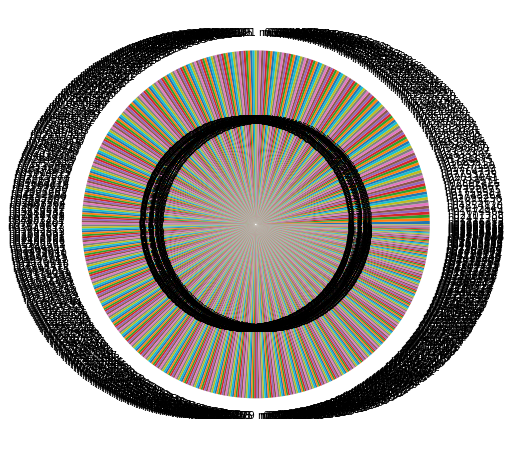

In [21]:
#target classes distribution

plt.figure(figsize=(8, 8))
df['image_category'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.show()

#observation: too many target classes that may lead to significantly less accuracy

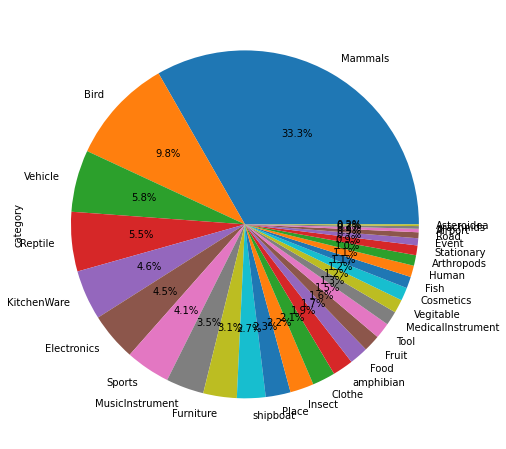

In [22]:
#target classes distribution

plt.figure(figsize=(8, 8))
df['category'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.show()

#highly unbalanced, too many classes

In [23]:
#function to add sub category
def find_and_replace(word):
  target_dict={"Animals":["Mammals","Bird","Reptile","Fish","amphibian","Asteroidea","Arthropods","arachnids","Insect"],
             "Tool":["Tool","MusicInstrument","MedicalInstrument","Stationary"],
             "Fashion":["Clothe","Cosmetics"],
             "Home_Appliances":["KitchenWare","Electronics","Furniture"],
             "Transport":["Vehicle","shipboat"],
             "Sports":["Sports"],
             "Place":["Road","Place","Airport","Event"],
             "Food":["Fruit","Food","Vegitable"],
             "Human":["Human"]            
             }
  list_list=[]
  for i in target_dict.values():
    list_list.append(i)
  for n in range(len(list_list)):
     if word in list_list[n]:
      key_index=n
  keys_list = list(target_dict)
  key = keys_list[key_index]
  return key

In [24]:
#add sub category

cat_list=df['category'].tolist()

print(cat_list)

for i,cat in enumerate(cat_list):
  cat_list[i]=find_and_replace(cat)

print(cat_list)

['Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals'

In [25]:
df['sub_category'] = cat_list

#move new column to first location
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df.head()

,sub_category,category,image_category,channels,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,t_11,t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_20,t_21,t_22,t_23,t_24,t_25,t_26,t_27,t_28,t_29,t_30,t_31,t_32,t_33,t_34,t_35,t_36,...,t_353,t_354,t_355,t_356,t_357,t_358,t_359,t_360,t_361,t_362,t_363,t_364,t_365,t_366,t_367,t_368,t_369,t_370,t_371,t_372,t_373,t_374,t_375,t_376,t_377,t_378,t_379,t_380,t_381,t_382,t_383,t_384,t_385,t_386,t_387,t_388,t_389,t_390,t_391,t_392
0,Animals,Mammals,n02077923,AF3,4320.000000,4332.307692,4334.871795,4342.564103,4333.333333,4313.333333,4318.974359,4349.743590,4358.974359,4335.384615,4321.025641,4333.333333,4345.641026,4334.358974,4321.025641,4320.000000,4321.538462,4320.000000,4311.794872,4309.230769,4311.282051,4301.025641,4288.205128,4291.794872,4296.923077,4290.769231,4303.076923,4337.435897,4334.358974,4298.974359,4292.307692,4305.128205,4305.641026,4305.641026,4303.589744,4286.153846,...,4276.410256,4277.948718,4275.384615,4258.974359,4261.025641,4271.794872,4266.153846,4265.641026,4267.179487,4260.000000,4262.051282,4265.641026,4257.948718,4254.871795,4267.692308,4286.153846,4284.615385,4265.128205,4256.410256,4261.025641,4265.641026,4261.025641,4239.487179,4213.846154,4229.230769,4265.128205,4263.589744,4250.256410,4266.666667,4275.384615,4250.256410,4233.846154,4235.897436,4216.923077,4192.820513,4200.000000,4224.615385,4240.512821,4233.846154,4210.769231
1,Animals,Mammals,n02077923,AF4,4294.871795,4305.128205,4298.974359,4307.179487,4312.307692,4284.102564,4274.871795,4314.358974,4330.769231,4324.615385,4311.282051,4275.384615,4284.615385,4322.564103,4318.461538,4285.641026,4272.820513,4307.692308,4353.333333,4341.538462,4307.179487,4307.692308,4307.692308,4304.615385,4321.538462,4312.307692,4292.307692,4298.461538,4285.641026,4278.461538,4311.282051,4318.974359,4297.435897,4301.025641,4321.538462,4325.128205,...,4238.461538,4242.564103,4290.769231,4284.615385,4238.974359,4250.769231,4297.948718,4325.641026,4326.666667,4294.871795,4265.128205,4254.358974,4251.282051,4272.307692,4273.846154,4240.000000,4239.487179,4269.230769,4267.692308,4254.871795,4265.128205,4272.820513,4254.358974,4223.589744,4254.358974,4302.564103,4257.948718,4215.384615,4256.410256,4264.102564,4211.794872,4210.256410,4243.589744,4232.820513,4211.282051,4222.051282,4228.717949,4213.846154,4220.000000,4246.666667
2,Animals,Mammals,n02077923,T7,4187.692308,4200.000000,4208.717949,4199.487179,4199.487179,4208.205128,4210.769231,4228.205128,4258.974359,4257.948718,4232.820513,4235.384615,4251.282051,4246.666667,4245.128205,4245.641026,4237.948718,4237.948718,4237.435897,4229.743590,4237.435897,4245.641026,4230.769231,4222.051282,4230.256410,4232.307692,4227.179487,4231.282051,4244.102564,4250.769231,4241.538462,4231.794872,4237.435897,4244.615385,4244.615385,4244.102564,...,4258.974359,4237.948718,4240.512821,4254.358974,4254.358974,4254.871795,4262.564103,4254.871795,4237.948718,4247.692308,4271.282051,4264.615385,4248.717949,4258.461538,4273.846154,4271.794872,4258.974359,4250.769231,4253.846154,4265.128205,4264.102564,4247.179487,4241.538462,4237.435897,4238.974359,4268.205128,4289.230769,4271.794872,4256.923077,4273.846154,4267.179487,4230.256410,4221.538462,4234.871795,4234.871795,4228.205128,4228.205128,4232.307692,4232.820513,4229.743590
3,Animals,Mammals,n02077923,T8,4203.076923,4224.615385,4249.743590,4231.794872,4190.769231,4186.666667,4208.717949,4223.589744,4226.153846,4229.230769,4233.846154,4222.564103,4210.256410,4215.384615,4217.948718,4202.051282,4188.717949,4202.564103,4215.897436,4219.487179,4226.666667,4214.358974,4183.589744,4184.102564,4221.538462,4242.564103,4226.153846,4217.948718,4225.128205,4208.717949,4185.128205,4206.153846,4228.717949,4204.102564,4182.051282,4194.871795,...,4202.564103,4213.333333,4215.897436,4193.846154,4193.333333,4217.948718,4225.128205,4218.974359,4207.692308,4191.794872,4205.128205,4207.179487,4166.666667,4169.230769,4227.692308,4233.333333,4181.538462,4187.692308,4235.384615,

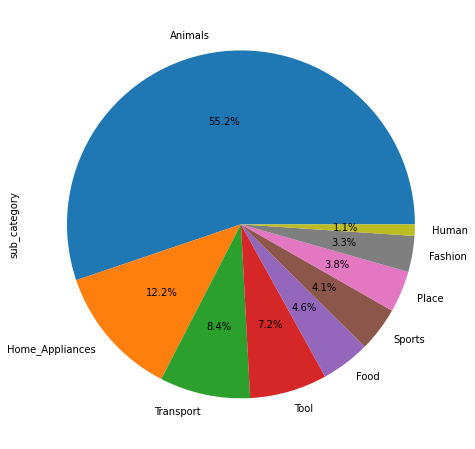

In [26]:
#target classes distribution

plt.figure(figsize=(8, 8))
df['sub_category'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.show()

### encoding category column

In [27]:
#label encoding

le = preprocessing.LabelEncoder()
df['category'] = le.fit_transform(df.category.values)
df['image_category'] = le.fit_transform(df.image_category.values)
df['channels'] = le.fit_transform(df.channels.values)
df['sub_category'] = le.fit_transform(df.sub_category.values)
df.head()


,sub_category,category,image_category,channels,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,t_11,t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_20,t_21,t_22,t_23,t_24,t_25,t_26,t_27,t_28,t_29,t_30,t_31,t_32,t_33,t_34,t_35,t_36,...,t_353,t_354,t_355,t_356,t_357,t_358,t_359,t_360,t_361,t_362,t_363,t_364,t_365,t_366,t_367,t_368,t_369,t_370,t_371,t_372,t_373,t_374,t_375,t_376,t_377,t_378,t_379,t_380,t_381,t_382,t_383,t_384,t_385,t_386,t_387,t_388,t_389,t_390,t_391,t_392
0,0,15,121,0,4320.000000,4332.307692,4334.871795,4342.564103,4333.333333,4313.333333,4318.974359,4349.743590,4358.974359,4335.384615,4321.025641,4333.333333,4345.641026,4334.358974,4321.025641,4320.000000,4321.538462,4320.000000,4311.794872,4309.230769,4311.282051,4301.025641,4288.205128,4291.794872,4296.923077,4290.769231,4303.076923,4337.435897,4334.358974,4298.974359,4292.307692,4305.128205,4305.641026,4305.641026,4303.589744,4286.153846,...,4276.410256,4277.948718,4275.384615,4258.974359,4261.025641,4271.794872,4266.153846,4265.641026,4267.179487,4260.000000,4262.051282,4265.641026,4257.948718,4254.871795,4267.692308,4286.153846,4284.615385,4265.128205,4256.410256,4261.025641,4265.641026,4261.025641,4239.487179,4213.846154,4229.230769,4265.128205,4263.589744,4250.256410,4266.666667,4275.384615,4250.256410,4233.846154,4235.897436,4216.923077,4192.820513,4200.000000,4224.615385,4240.512821,4233.846154,4210.769231
1,0,15,121,1,4294.871795,4305.128205,4298.974359,4307.179487,4312.307692,4284.102564,4274.871795,4314.358974,4330.769231,4324.615385,4311.282051,4275.384615,4284.615385,4322.564103,4318.461538,4285.641026,4272.820513,4307.692308,4353.333333,4341.538462,4307.179487,4307.692308,4307.692308,4304.615385,4321.538462,4312.307692,4292.307692,4298.461538,4285.641026,4278.461538,4311.282051,4318.974359,4297.435897,4301.025641,4321.538462,4325.128205,...,4238.461538,4242.564103,4290.769231,4284.615385,4238.974359,4250.769231,4297.948718,4325.641026,4326.666667,4294.871795,4265.128205,4254.358974,4251.282051,4272.307692,4273.846154,4240.000000,4239.487179,4269.230769,4267.692308,4254.871795,4265.128205,4272.820513,4254.358974,4223.589744,4254.358974,4302.564103,4257.948718,4215.384615,4256.410256,4264.102564,4211.794872,4210.256410,4243.589744,4232.820513,4211.282051,4222.051282,4228.717949,4213.846154,4220.000000,4246.666667
2,0,15,121,3,4187.692308,4200.000000,4208.717949,4199.487179,4199.487179,4208.205128,4210.769231,4228.205128,4258.974359,4257.948718,4232.820513,4235.384615,4251.282051,4246.666667,4245.128205,4245.641026,4237.948718,4237.948718,4237.435897,4229.743590,4237.435897,4245.641026,4230.769231,4222.051282,4230.256410,4232.307692,4227.179487,4231.282051,4244.102564,4250.769231,4241.538462,4231.794872,4237.435897,4244.615385,4244.615385,4244.102564,...,4258.974359,4237.948718,4240.512821,4254.358974,4254.358974,4254.871795,4262.564103,4254.871795,4237.948718,4247.692308,4271.282051,4264.615385,4248.717949,4258.461538,4273.846154,4271.794872,4258.974359,4250.769231,4253.846154,4265.128205,4264.102564,4247.179487,4241.538462,4237.435897,4238.974359,4268.205128,4289.230769,4271.794872,4256.923077,4273.846154,4267.179487,4230.256410,4221.538462,4234.871795,4234.871795,4228.205128,4228.205128,4232.307692,4232.820513,4229.743590
3,0,15,121,4,4203.076923,4224.615385,4249.743590,4231.794872,4190.769231,4186.666667,4208.717949,4223.589744,4226.153846,4229.230769,4233.846154,4222.564103,4210.256410,4215.384615,4217.948718,4202.051282,4188.717949,4202.564103,4215.897436,4219.487179,4226.666667,4214.358974,4183.589744,4184.102564,4221.538462,4242.564103,4226.153846,4217.948718,4225.128205,4208.717949,4185.128205,4206.153846,4228.717949,4204.102564,4182.051282,4194.871795,...,4202.564103,4213.333333,4215.897436,4193.846154,4193.333333,4217.948718,4225.128205,4218.974359,4207.692308,4191.794872,4205.128205,4207.179487,4166.666667,4169.230769,4227.692308,4233.333333,4181.538462,4187.692308,4235.384615,4240.000000,4235.897436,4229.743590,4184.615385,4155.897436,4189.743590,42

In [28]:
#after label encoding of target column
print(len(df['category'].unique()))
df['category'].unique()

29


array([15, 24, 18, 16,  6, 14,  3, 25, 21,  7,  0, 27,  9, 20, 19, 17, 28,
       26, 10,  8, 12, 11,  5,  1,  4, 22, 23, 13,  2])

### categorical value counts

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b4103a150>]],
      dtype=object)

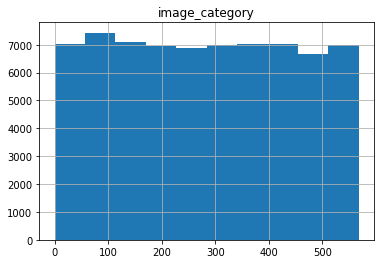

In [29]:
df.hist(column='image_category')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b40ed6b10>]],
      dtype=object)

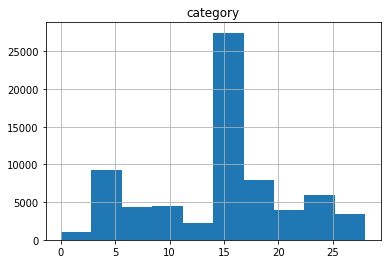

In [30]:
df.hist(column='category')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b3f649810>]],
      dtype=object)

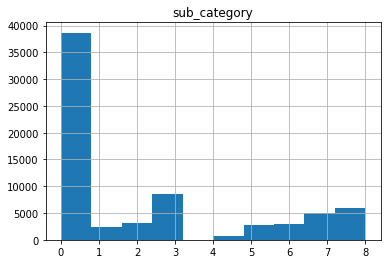

In [31]:
df.hist(column='sub_category')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b3f52b4d0>]],
      dtype=object)

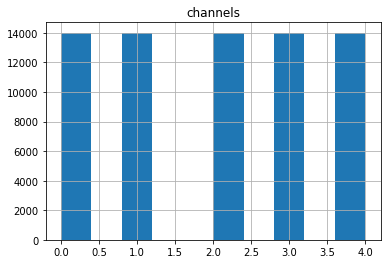

In [32]:
df.hist(column='channels')

### View Signals

In [33]:
categorical_features=['category','image_category','channels']
continuous_features=df.columns.tolist()[1:]

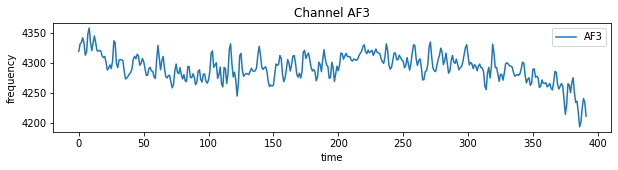

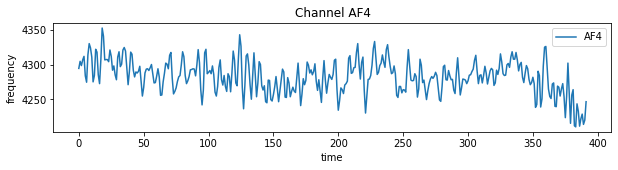

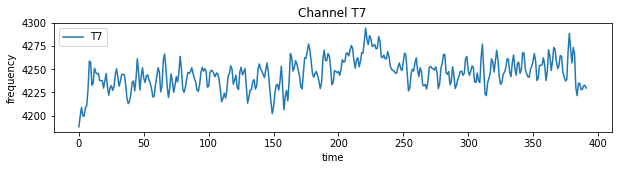

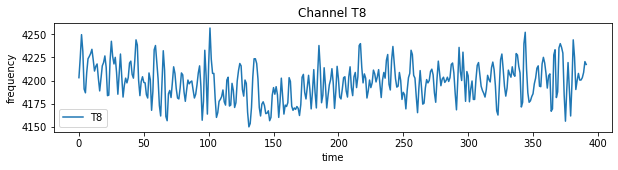

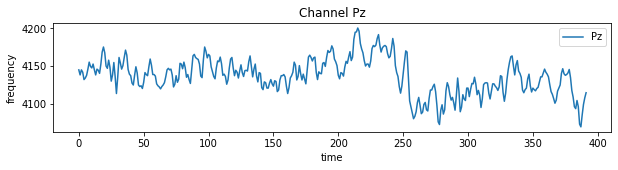

In [34]:
#plot frequencies for all channels for first category (i.e first 5 rows)
channels=['AF3', 'AF4', 'T7', 'T8', 'Pz']
j=0
for i in range(5):

  sample = df.loc[i, 't_1':]
  channel= channels[j]
  j=j+1
  plt.figure(figsize=(10, 2))
  plt.plot(range(len(sample)), sample, label=channel)
  
  plt.title("Channel "+channel)
  plt.ylabel('frequency')
  plt.xlabel('time')
  plt.legend()
  plt.show()
  
  print("\n")
j=0

# Handling unbalanced data



In [35]:
X=df.drop(['sub_category',	'category',	'image_category',	'channels'	],axis=1)
y=df['sub_category']


In [36]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import collections, numpy

#function to print count  of classes
def print_counter(y_data):
  counter = Counter(y)
  for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
  #plot the distribution of classes
  plt.bar(counter.keys(), counter.values())
  plt.show()

Class=0, n=38675 (55.203%)
Class=2, n=3190 (4.553%)
Class=5, n=2695 (3.847%)
Class=7, n=5045 (7.201%)
Class=3, n=8565 (12.225%)
Class=8, n=5895 (8.414%)
Class=6, n=2905 (4.146%)
Class=4, n=745 (1.063%)
Class=1, n=2345 (3.347%)


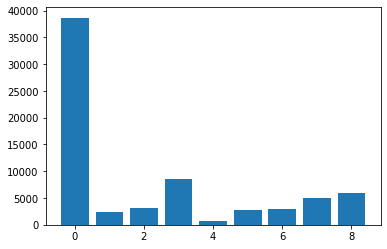

In [37]:
print_counter(y) #original y distribution

In [38]:
count_class=collections.Counter(y)
print(count_class) #occurances of all classes
count_class[0] #number of occurances of class 0

Counter({0: 38675, 3: 8565, 8: 5895, 7: 5045, 2: 3190, 6: 2905, 5: 2695, 1: 2345, 4: 745})


38675

In [39]:
int(count_class[0]*25/100)  #retain 25% of data from 0 with 0 class

9668

### undersampling majority class

Class=0, n=9668 (23.550%)
Class=1, n=2345 (5.712%)
Class=2, n=3190 (7.770%)
Class=3, n=8565 (20.863%)
Class=4, n=745 (1.815%)
Class=5, n=2695 (6.565%)
Class=6, n=2905 (7.076%)
Class=7, n=5045 (12.289%)
Class=8, n=5895 (14.359%)


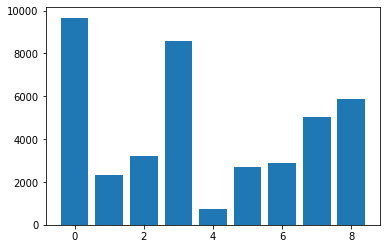

In [40]:
rus = RandomUnderSampler({0:int(count_class[0]*25/100)},random_state=0)
rus.fit(X, y)
X, y = rus.fit_resample(X, y)


print_counter(y)

### oversampling minority class

Class=0, n=9668 (11.111%)
Class=1, n=9668 (11.111%)
Class=2, n=9668 (11.111%)
Class=3, n=9668 (11.111%)
Class=4, n=9668 (11.111%)
Class=5, n=9668 (11.111%)
Class=6, n=9668 (11.111%)
Class=7, n=9668 (11.111%)
Class=8, n=9668 (11.111%)


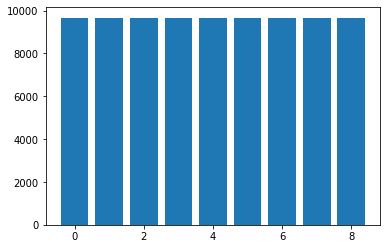

In [41]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
ros.fit(X, y)
X, y = ros.fit_resample(X, y)

print_counter(y)

# Filters

## Bandpass filter

In [42]:
signal = df.drop(columns=categorical_features).copy()

signal=signal[:1]
before=signal[:1]

In [43]:


fs= 128.0
lowcut = 20.0
highcut = 50.0

nyq = 0.5*fs
low = lowcut / nyq
high = highcut / nyq

order =2 

b,a = scipy.signal.butter(order,(low,high),'bandpass',analog=False)

signal_filtered = scipy.signal.filtfilt(b,a,signal.T,axis=0)


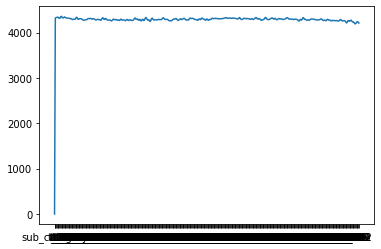

In [44]:
plt.plot(before.T)  #before

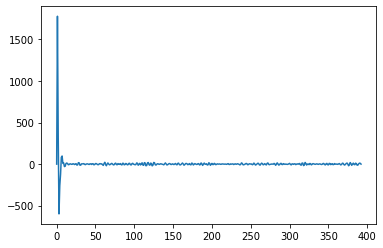

In [45]:
plt.plot(signal_filtered)

## low pass filter

In [46]:


fs= 128.0
lowcut = 20.0
highcut = 50.0

nyq = 0.5*fs
low = lowcut / nyq
high = highcut / nyq

order =2 

b,a = scipy.signal.butter(order,low,'low',analog=False)

signal_filtered = scipy.signal.filtfilt(b,a,signal.T,axis=0)


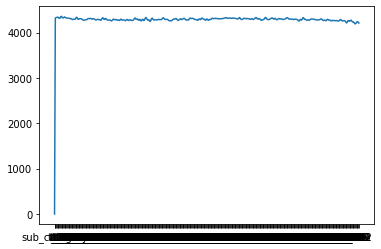

In [47]:
plt.plot(before.T)  #before

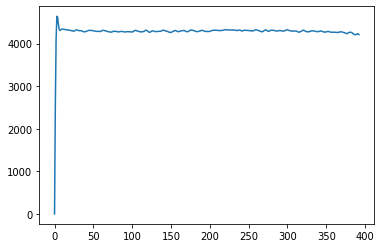

In [48]:
plt.plot(signal_filtered)

## High pass filter

In [49]:


fs= 128.0
lowcut = 20.0
highcut = 50.0

nyq = 0.5*fs
low = lowcut / nyq
high = highcut / nyq

order =2 

b,a = scipy.signal.butter(order,high,'high',analog=False)

signal_filtered = scipy.signal.filtfilt(b,a,signal.T,axis=0)

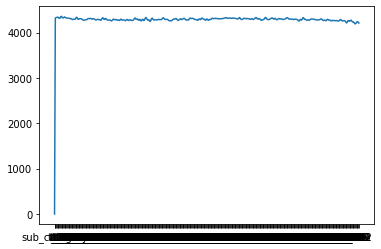

In [50]:
plt.plot(before.T)  #before

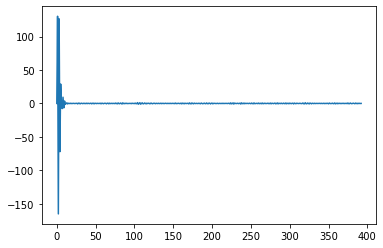

In [51]:
plt.plot(signal_filtered)